In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# New Section

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/gao

/content/drive/MyDrive/Colab Notebooks/gao


In [6]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip = True)

In [7]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/gao/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1000 images belonging to 5 classes.


In [8]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/gao/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 250 images belonging to 5 classes.


In [9]:
training_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [10]:
test_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [11]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
32/32 [==============================] - 360s 11s/step - loss: 1.2325 - accuracy: 0.5830
Epoch 2/100
32/32 [==============================] - 8s 250ms/step - loss: 0.4628 - accuracy: 0.8200
Epoch 3/100
32/32 [==============================] - 8s 249ms/step - loss: 0.4186 - accuracy: 0.8280
Epoch 4/100
32/32 [==============================] - 8s 239ms/step - loss: 0.3723 - accuracy: 0.8480
Epoch 5/100
32/32 [==============================] - 9s 273ms/step - loss: 0.4613 - accuracy: 0.8290
Epoch 6/100
32/32 [==============================] - 8s 246ms/step - loss: 0.3814 - accuracy: 0.8420
Epoch 7/100
32/32 [==============================] - 8s 241ms/step - loss: 0.3617 - accuracy: 0.8480
Epoch 8/100
32/32 [==============================] - 8s 241ms/step - loss: 0.3568 - accuracy: 0.8610
Epoch 9/100
32/32 [==============================] - 8s 241ms/step - loss: 0.3624 - accuracy: 0.8590
Epoch 10/100
32/32 [==============================] - 8s 241ms/step - loss: 0.3621 - accura

In [13]:
model.save('GAO.h5')

In [14]:
model_gao = load_model('GAO.h5')

In [15]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.005796921439468861
Train Accuracy 0.9980000257492065


1/1 [==============================] - 0s 44ms/step
Đây là loại gạo : Basmati


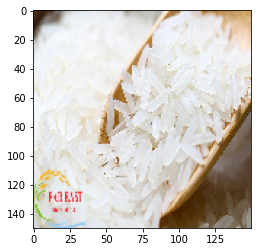

In [23]:
img = load_img('/Cambodian-Long-Grain-Fragrant-Rice-5-Brokens_add.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_gao.predict(img)
class_gao=['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là loại gạo :", class_gao[a])

1/1 [==============================] - 0s 15ms/step
Đây là loại gạo : Ipsala


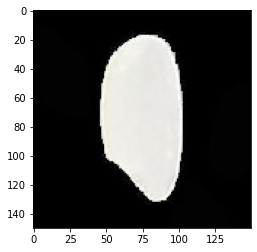

In [21]:
img = load_img('/gao nateraw.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_gao.predict(img)
class_gao=['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là loại gạo :", class_gao[a])

In [25]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/nhandienhatgao.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/nhandienhatgao.ipynb to html
[NbConvertApp] Writing 455799 bytes to /content/drive/MyDrive/Colab Notebooks/nhandienhatgao.html
